In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Importing the dataset

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head(2)

,Client ID,Company ID,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Flag 6,Activity 1 Time Period 11,...,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0,Client Retention Flag
0,10004519380,6294937,Jun,Multi Year,2,Yes,Unknown,8,Manufacturing,24,...,0,0,0,0,0,0,0,1,0,Yes
1,10004521476,6293796,Mar,Multi Year,7,No,Yes,6,Government,9,...,0,0,0,0,0,1,0,0,0,No


In [6]:
test.head(2)

,Client ID,Company ID,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Flag 6,Activity 1 Time Period 11,...,Activity 8 Time Period 9,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0
0,10004520718,6295189,Apr,Single Year,10,Yes,Yes,8,Manufacturing,47,...,0,0,0,0,0,0,0,0,0,0
1,10004519187,6295450,May,Single Year,2,Yes,Unknown,3,Education,116,...,0,0,0,0,0,0,0,1,0,0


#  Data cleaning

In [7]:
train.describe()

,Client ID,Company ID,Flag 2,Flag 5,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,Activity 1 Time Period 7,Activity 1 Time Period 6,...,Activity 8 Time Period 9,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0
count,8.766000e+03,8.766000e+03,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,...,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000
mean,1.000452e+10,6.293817e+06,4.132101,9.001141,11.413187,11.797171,11.479808,11.837212,11.889802,11.852384,...,0.022701,0.032740,0.028519,0.030459,0.028862,0.049966,0.042094,0.042893,0.037988,0.033311
std,3.602220e+03,1.132758e+03,2.367710,5.136960,35.461407,62.115059,30.590044,30.707721,30.484649,29.658165,...,0.168373,0.197994,0.197783,0.197205,0.203702,0.276915,0.256233,0.254536,0.233124,0.201612
min,1.000451e+10,6.292019e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000451e+10,6.292837e+06,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000452e+10,6.293743e+06,3.000000,8.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000452e+10,6.294677e+06,6.000000,15.000000,10.000000,10.000000,10.000000,11.000000,12.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000452e+10,6.296180e+06,13.000000,21.000000,1472.000000,5064.000000,904.000000,896.000000,856.000000,656.000000,...,4.000000,3.000000,4.000000,6.000000,5.000000,6.000000,5.000000,6.000000,5.000000,4.000000


In [8]:
# train.isna().sum()

In [9]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 106 columns):
Client ID                         int64
Company ID                        int64
Client Contract Starting Month    object
Flag 1                            object
Flag 2                            int64
Flag 3                            object
Flag 4                            object
Flag 5                            int64
Flag 6                            object
Activity 1 Time Period 11         int64
Activity 1 Time Period 10         int64
Activity 1 Time Period 9          int64
Activity 1 Time Period 8          int64
Activity 1 Time Period 7          int64
Activity 1 Time Period 6          int64
Activity 1 Time Period 5          int64
Activity 1 Time Period 4          int64
Activity 1 Time Period 3          int64
Activity 1 Time Period 2          int64
Activity 1 Time Period 1          int64
Activity 1 Time Period 0          int64
Activity 2 Time Period 11         int64
Activit

In [10]:
train_continuous=train.copy().drop(columns=['Client Contract Starting Month','Flag 1','Flag 3','Flag 4','Flag 6','Client Retention Flag'])

In [11]:
train_continuous.head()

,Client ID,Company ID,Flag 2,Flag 5,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,Activity 1 Time Period 7,Activity 1 Time Period 6,...,Activity 8 Time Period 9,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0
0,10004519380,6294937,2,8,24,16,20,52,0,14,...,0,0,0,0,0,0,0,0,1,0
1,10004521476,6293796,7,6,9,2,0,18,27,0,...,0,0,0,0,0,0,1,0,0,0
2,10004515403,6293911,2,15,1,11,12,0,11,13,...,0,0,0,0,0,0,0,0,0,0
3,10004511478,6293048,2,15,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,10004516858,6294364,7,9,16,14,48,6,6,0,...,0,0,0,0,0,0,0,0,0,0


# Histogram Plotting of numerical columns

In [359]:
# plt.suptitle("Histogram plot of numerical columns",fontsize=20)
# for i in range(1,train_plot.shape[1]+1):
#     plt.subplot(3,3,i)
#     f=plt.gca()
#     f.set_title(train_plot.columns.values[i-1])
#     vals=np.size(train_plot.iloc[:,i-1].unique())
#     plt.hist(train_plot.iloc[:,i-1],bins=vals,color='#3F5D7D')

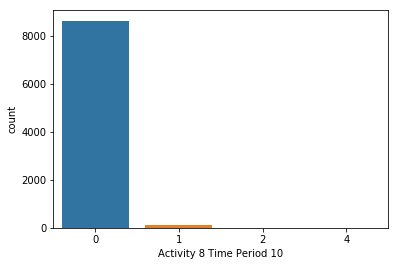

In [445]:
sns.countplot(train_continuous['Activity 8 Time Period 10'])

In [361]:
# train_plot.corrwith(train['Client Retention Flag']).plot.bar(figsize=(20,10),title='plot',rot=45,grid=True)
# for column in train_plot.columns:
#     print(train_plot[column].value_counts())

#  Analysis of categorical variable

In [362]:
categorical_variable=pd.DataFrame(train,columns=['Client Contract Starting Month','Flag 1','Flag 3','Flag 4','Flag 6','Client Retention Flag'])

In [363]:
for cols in categorical_variable.columns:
    print(categorical_variable[cols].value_counts())
    print("\n")

Jun    1322
Mar    1235
Dec    1086
Sep     839
Feb     679
May     630
Oct     611
Jan     529
Aug     527
Apr     508
Jul     436
Nov     364
Name: Client Contract Starting Month, dtype: int64


Single Year    5947
Multi Year     2819
Name: Flag 1, dtype: int64


Yes    4481
No     4284
C         1
Name: Flag 3, dtype: int64


Unknown    6858
Yes        1904
No            4
Name: Flag 4, dtype: int64


Education                 2510
Manufacturing             2114
Technology and Telecom    1494
Government                 986
Banking, Finance & Ins     659
Healthcare                 354
Services                   333
Energy & Utilities         183
Retail                     103
Unknown                     30
Name: Flag 6, dtype: int64


Yes    6170
No     2596
Name: Client Retention Flag, dtype: int64




# Dealing with categorical variable and perparing training data

Preparing train data

In [57]:
x_train=train.drop(columns=['Client ID','Client Retention Flag'])
y_train=train['Client Retention Flag']

Preparing test data

In [58]:
x_test=test.drop(columns=['Client ID'])

In [59]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'. 
y_train= label_encoder.fit_transform(train['Client Retention Flag']) 
#y_train=pd.Series(y_train)

In [60]:
#one hot encoding of categorical variables
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [61]:
print(x_train.shape)
print(x_test.shape)

(8766, 129)
(3756, 129)


# Checking collinearity with target variable

In [85]:
df=train.drop(columns=['Client ID','Client Contract Starting Month','Flag 1','Flag 3','Flag 4','Flag 6'])
df['Client Retention Flag']=y_train

In [86]:
df.head()

,Company ID,Flag 2,Flag 5,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,Activity 1 Time Period 7,Activity 1 Time Period 6,Activity 1 Time Period 5,...,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0,Client Retention Flag
0,6294937,2,8,24,16,20,52,0,14,94,...,0,0,0,0,0,0,0,1,0,1
1,6293796,7,6,9,2,0,18,27,0,26,...,0,0,0,0,0,1,0,0,0,0
2,6293911,2,15,1,11,12,0,11,13,5,...,0,0,0,0,0,0,0,0,0,1
3,6293048,2,15,1,0,0,0,2,0,10,...,0,0,0,0,0,0,0,0,0,0
4,6294364,7,9,16,14,48,6,6,0,8,...,0,0,0,0,0,0,0,0,0,1


In [95]:
featureCorr = df[df.columns[0:100]].corr()['Client Retention Flag'][:].to_frame()
featureCorr.rename(columns={'Client Retention Flag':'correlation'},inplace=True)
featureCorr.sort_values(by=['correlation'],ascending=False).head()

,correlation
Client Retention Flag,1.000000
Activity 1 Time Period 5,0.148919
Activity 1 Time Period 2,0.145976
Activity 1 Time Period 3,0.144634
Activity 1 Time Period 4,0.140824


# Checking collinearity and correlation activity wise

In [76]:
#Analysis of activity by years
activitydf = pd.DataFrame()
activitydf['Activity 1']=train_continuous.iloc[:,4:16].sum(axis=1)
activitydf['Activity 2']=train_continuous.iloc[:,16:28].sum(axis=1)
activitydf['Activity 3']=train_continuous.iloc[:,28:40].sum(axis=1)
activitydf['Activity 4']=train_continuous.iloc[:,40:52].sum(axis=1)
activitydf['Activity 5']=train_continuous.iloc[:,52:64].sum(axis=1)
activitydf['Activity 6']=train_continuous.iloc[:,64:76].sum(axis=1)
activitydf['Activity 7']=train_continuous.iloc[:,76:88].sum(axis=1)
activitydf['Activity 8']=train_continuous.iloc[:,88:100].sum(axis=1)
activitydf['Client Retention Flag']=y_train
activitydf.head()

,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Client Retention Flag
0,352,50,11,5,0,0,0,4,1
1,96,2,0,2,0,0,0,1,0
2,113,10,0,4,0,0,0,0,1
3,14,0,0,3,1,0,1,1,0
4,214,16,0,6,0,0,0,0,1


In [78]:
activityCorr=activitydf[activitydf.columns[0:9]].corr()['Client Retention Flag'][:].to_frame()
activityCorr.sort_values(by=['Client Retention Flag'],ascending=False)

,Client Retention Flag
Client Retention Flag,1.000000
Activity 1,0.174135
Activity 4,0.087143
Activity 3,0.079984
Activity 7,0.079391
Activity 5,0.077065
Activity 8,0.069216
Activity 6,0.059341
Activity 2,0.057872


Thus activity 1 , activity 4 and activity 3 has higher correlation with client retention flag

In [54]:
# g = sns.PairGrid(activitydf)
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);

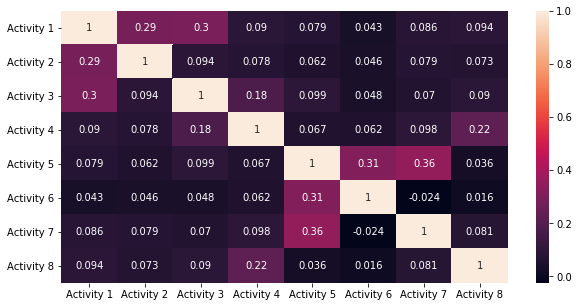

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(activitydf.corr(),annot=True)

Activity 1 has correlation with activity 2 and activity 3<br>
Activity 5 has correlation with activity 6 and activity 7<br>
Activity 4 has correlation with activity 8

# Feature importance

In [485]:
from xgboost import XGBClassifier, plot_importance
xgb_fimp=XGBClassifier(n_estimators=500,max_depth=6,learning_rate=0.1)
xgb_fimp.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [486]:
sorted_idx = np.argsort(xgb_fimp.feature_importances_)[::-1]

<Figure size 1080x720 with 0 Axes>

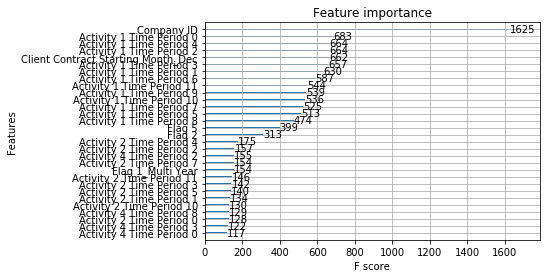

In [487]:
plt.figure(figsize=(15,10))
plot_importance(xgb_fimp,max_num_features=30)
plt.show()

In [488]:
# for index in sorted_idx:
#     print([x_train.columns[index], xgb.feature_importances_[index]]) 
important_feature_col=[]
for index in sorted_idx:
    print([x_train.columns[index], xgb_fimp.feature_importances_[index]])
    if(xgb_fimp.feature_importances_[index]>=0.001):
        important_feature_col.append(x_train.columns[index])

['Client Contract Starting Month_Dec', 0.040467616]
['Activity 1 Time Period 0', 0.03839808]
['Activity 1 Time Period 4', 0.020919496]
['Activity 4 Time Period 0', 0.02072888]
['Activity 1 Time Period 2', 0.019502984]
['Activity 3 Time Period 0', 0.01806029]
['Activity 1 Time Period 5', 0.016762175]
['Activity 1 Time Period 1', 0.016454391]
['Activity 1 Time Period 8', 0.01594416]
['Activity 1 Time Period 7', 0.015488014]
['Client Contract Starting Month_Sep', 0.015347119]
['Activity 1 Time Period 9', 0.015155938]
['Flag 6_Government', 0.015147826]
['Activity 1 Time Period 3', 0.014794792]
['Flag 6_Banking, Finance & Ins', 0.014413537]
['Activity 1 Time Period 6', 0.014335522]
['Activity 8 Time Period 9', 0.014200128]
['Flag 6_Education', 0.014145991]
['Activity 8 Time Period 7', 0.014098813]
['Activity 1 Time Period 10', 0.012756883]
['Client Contract Starting Month_Apr', 0.012476822]
['Flag 6_Energy & Utilities', 0.012440138]
['Client Contract Starting Month_Jan', 0.012428892]
['Flag

In [489]:
print(len(important_feature_col))

112


In [490]:
x_train_fselected=x_train[important_feature_col]
x_test_fselected=x_test[important_feature_col]

In [491]:
print(x_train_fselected.shape)
print(x_test_fselected.shape)

(8766, 112)
(3756, 112)


# Feature scaling

In [493]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler=MinMaxScaler()

In [494]:
x_train_scaled=minMaxScaler.fit_transform(x_train)
x_test_scaled=minMaxScaler.fit_transform(x_test)

c:\users\kamlesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\kamlesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Grid Search

In [495]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
xx_train,xx_test,yy_train,yy_test=train_test_split(x_train_scaled,y_train,test_size=0.2,random_state=5)

In [496]:
param_grid={'max_depth':range(6,10,2),'n_estimators':[400,500],'learning_rate':[0.1,0.01]}

In [236]:
grid = GridSearchCV(estimator = XGBClassifier(),param_grid=param_grid,scoring='f1',refit=True,verbose=4,n_jobs=4)
grid.fit(xx_train,yy_train)

c:\users\kamlesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:  7.3min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:  7.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': range(6, 10, 2), 'n_estimators': [400, 500], 'learning_rate': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=4)

In [233]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [237]:
grid.best_params_
#learning_rate=0.1, max_depth=7, n_estimators=500, score=0.9206847122555226
#learning_rate=0.1, max_depth=5, n_estimators=500, score=0.9191545307443366

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}

# Predictive Model for train data

In [497]:
from sklearn.metrics import confusion_matrix,classification_report

In [426]:
train_model=XGBClassifier(n_estimators=500,max_depth=6,learning_rate=0.1)

In [427]:
train_model.fit(xx_train,yy_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [428]:
yy_test_predict=train_model.predict(xx_test)

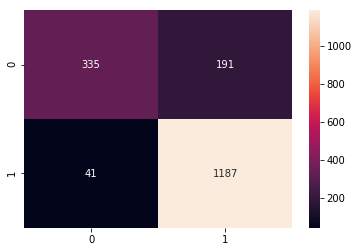

In [429]:
cm=confusion_matrix(yy_test,yy_test_predict)
sns.heatmap(cm,annot=True,fmt='g')

In [430]:
classification_report(yy_test,yy_test_predict)

'              precision    recall  f1-score   support\n\n           0       0.89      0.64      0.74       526\n           1       0.86      0.97      0.91      1228\n\n   micro avg       0.87      0.87      0.87      1754\n   macro avg       0.88      0.80      0.83      1754\nweighted avg       0.87      0.87      0.86      1754\n'

# Predictive XGB model for test data

In [498]:
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.1)
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [499]:
# y_test_predict_probab=xgb.predict_proba(x_test)[:,1]
y_test_predict=xgb.predict(x_test_scaled)

# Sample submission

In [500]:
sample_submission=pd.read_csv('Sample_Submission.csv')

In [501]:
sample_submission.head()

,Client ID,Client Retention Flag
0,1000123456,No
1,1000123457,No
2,1000123458,Yes
3,1000123459,Yes


# Test output

In [502]:
test_output=pd.DataFrame(columns=['Client ID','Client Retention Flag'],index=None)
test_output['Client ID']=test['Client ID']
test_output['Client Retention Flag']=y_test_predict
#test_output.to_csv('output2.csv')

In [503]:
test_output.head()

,Client ID,Client Retention Flag
0,10004520718,1
1,10004519187,1
2,10004515634,1
3,10004512321,0
4,10004518550,1


In [504]:
di = {1: "Yes", 0: "No"}

In [505]:
test_output['Client Retention Flag']=test_output['Client Retention Flag'].map(di) 

In [506]:
test_output.head()

,Client ID,Client Retention Flag
0,10004520718,Yes
1,10004519187,Yes
2,10004515634,Yes
3,10004512321,No
4,10004518550,Yes


In [507]:
test_output.to_csv('output_7.csv',index=False)